<a href="https://colab.research.google.com/github/SanjayS2348553/TRIMESTER-2/blob/main/2348553_Aml_lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic[1].csv")

In [ ]:
print(df.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [ ]:
# Drop the target attribute as it is not required for clustering
df = df.drop('NObeyesdad', axis=1)


In [ ]:
# Encode Categorical Data
df_encoded = pd.get_dummies(df)

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)


In [ ]:
# Define a range of k values to try
k_range = range(1, 11)


# Initialize an empty list to store the WCSS values for each k
wcss = []


# Loop over the k values
for k in k_range:
    # Create a KMeans object with k clusters
    kmeans = KMeans(n_clusters=k,init='k-means++' , random_state=0)

    # Fit the scaled data to the KMeans object
    kmeans.fit(df_scaled)

    # Append the WCSS value for the current k to the list
    wcss.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

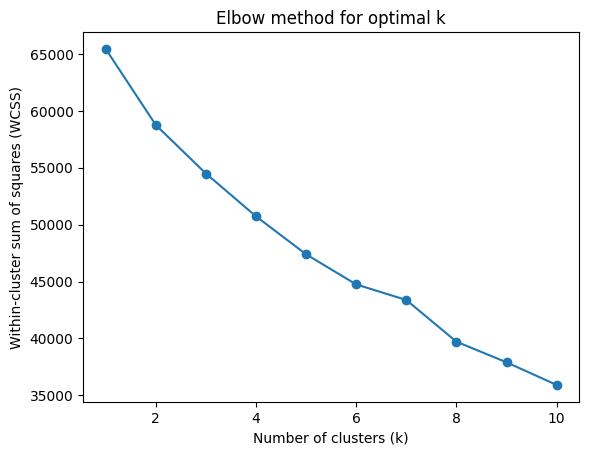

In [ ]:
# Plot the WCSS values against the k values
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow method for optimal k')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


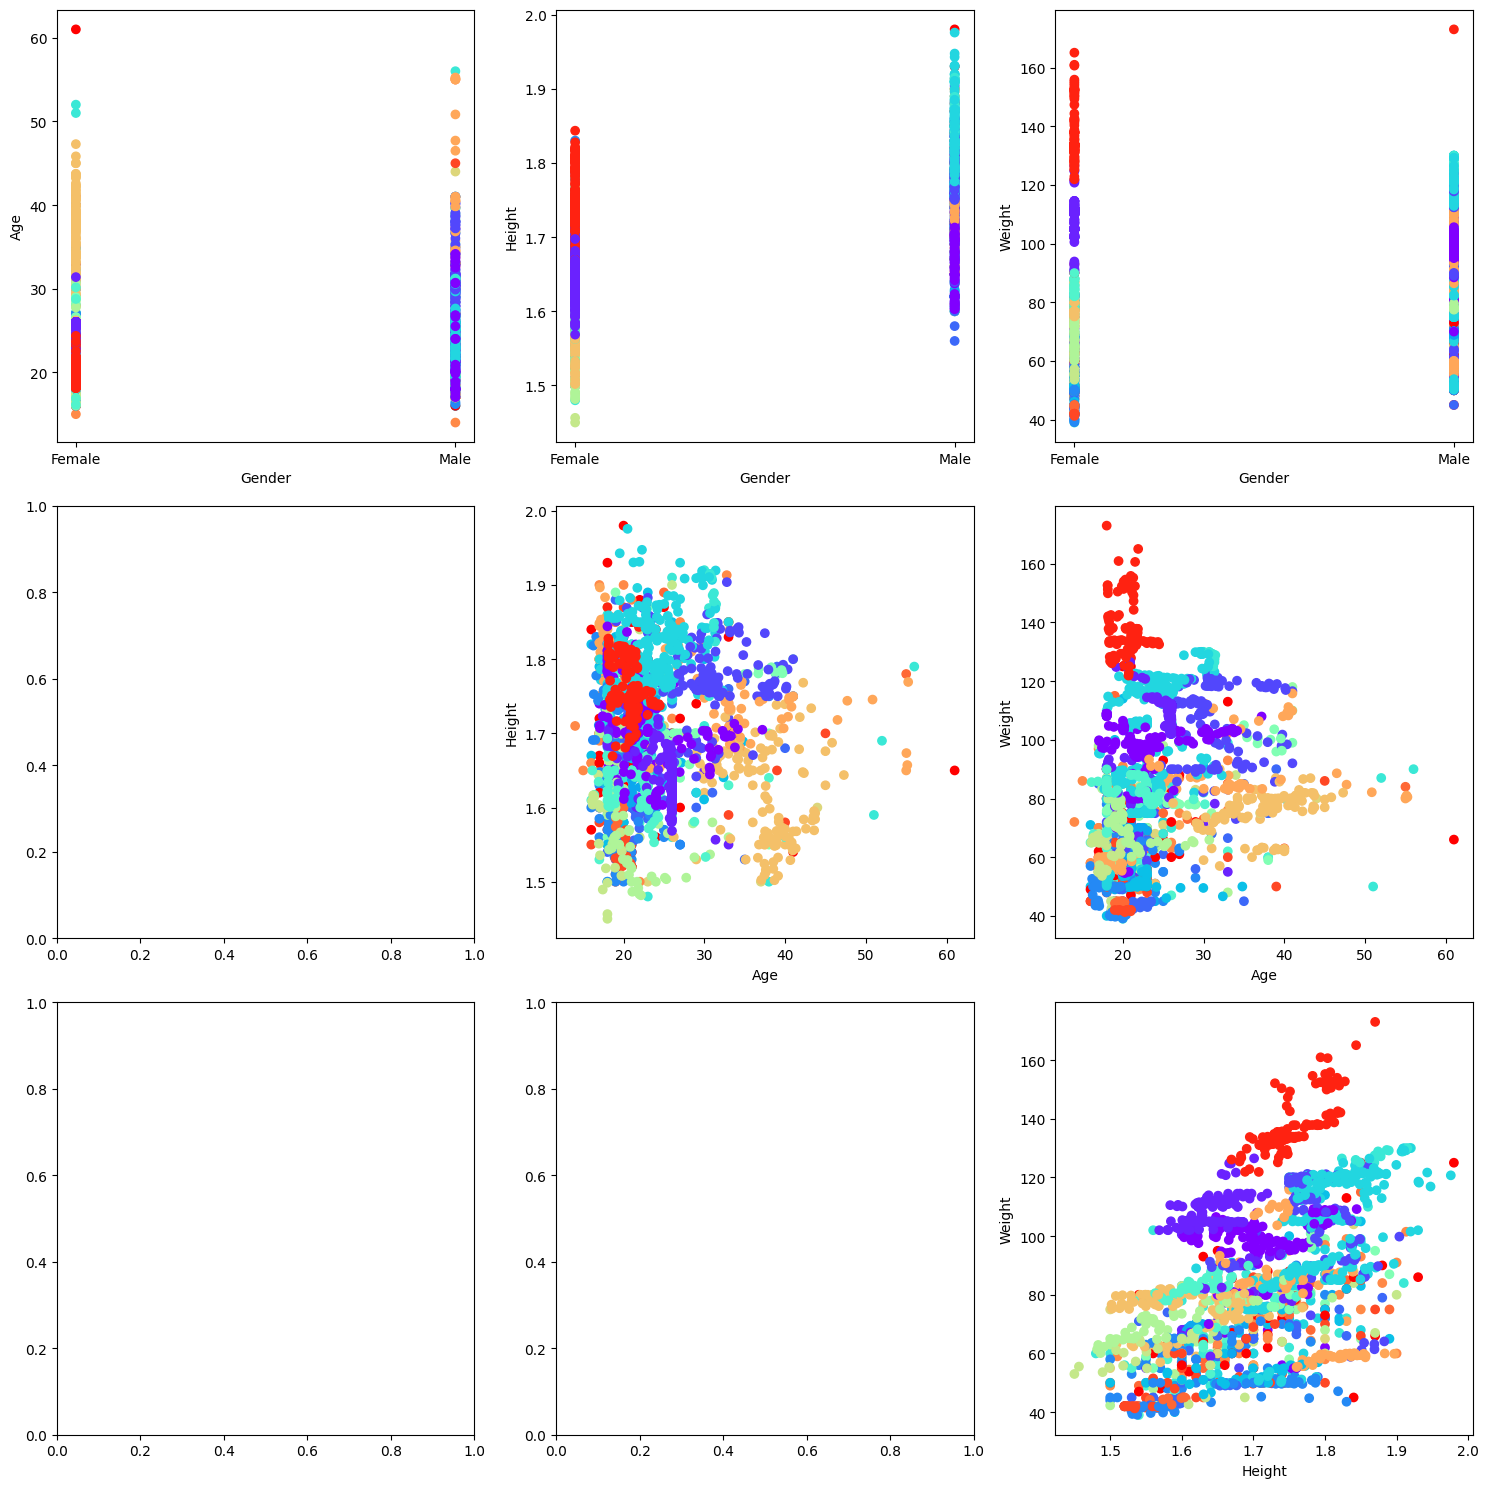

In [ ]:
# From the plot, we can see that the elbow point is at k=4, so we choose that as the optimal number of clusters

# Create a KMeans object with 4 clusters
kmeans = KMeans(n_clusters=23, random_state=0)

# Fit the scaled data to the KMeans object
kmeans.fit(df_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels as a new column to the original dataframe
df['cluster'] = labels

# Plot the clusters using subplots for different pairs of features
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(i+1, 4):
        # Get the feature names for the x and y axes
        x = df.columns[i]
        y = df.columns[j]

        # Plot the data points with different colors for different clusters
        axes[i, j-1].scatter(df[x], df[y], c=df['cluster'], cmap='rainbow')

        # Set the x and y labels
        axes[i, j-1].set_xlabel(x)
        axes[i, j-1].set_ylabel(y)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()
